In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [2]:
data = pd.read_csv('TSLA2.csv')
df = data.copy()

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2864,2021-11-11,1102.770020,1104.969971,1054.680054,1063.510010,1063.510010,22396600
2865,2021-11-12,1047.500000,1054.500000,1019.200012,1033.420044,1033.420044,25182300
2866,2021-11-15,1017.630005,1031.979980,978.599976,1013.390015,1013.390015,34775600
2867,2021-11-16,1003.309998,1057.199951,1002.179993,1054.729980,1054.729980,26542400
2868,2021-11-17,1063.510010,1119.640015,1055.500000,1089.010010,1089.010010,31002900


## EDA (Exploratory Data Analysis)

In [5]:
### Mengetahui tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2869 non-null   object 
 1   Open       2869 non-null   float64
 2   High       2869 non-null   float64
 3   Low        2869 non-null   float64
 4   Close      2869 non-null   float64
 5   Adj Close  2869 non-null   float64
 6   Volume     2869 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 157.0+ KB


In [6]:
### Mengecek data yang kosong
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2869.000000,2869.000000,2869.000000,2869.000000,2869.000000,2.869000e+03
mean,113.572887,115.985433,111.099821,113.707617,113.707617,3.147393e+07
std,206.400884,210.929126,201.918524,206.824813,206.824813,2.836104e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,11.294000,11.640000,11.024000,11.102000,11.102000,1.264560e+07
50%,46.000000,46.751999,45.230000,46.001999,46.001999,2.503650e+07
75%,65.875999,67.099998,64.711998,65.984001,65.984001,4.014650e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [9]:
dv = df.copy()

In [10]:
### Menambah kolom no
dv.insert(0, 'no', range(1, 1 + len(df)))
dv

,no,Date,Open,High,Low,Close,Adj Close,Volume
0,1,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,3,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,4,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,5,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...,...
2864,2865,2021-11-11,1102.770020,1104.969971,1054.680054,1063.510010,1063.510010,22396600
2865,2866,2021-11-12,1047.500000,1054.500000,1019.200012,1033.420044,1033.420044,25182300
2866,2867,2021-11-15,1017.630005,1031.979980,978.599976,1013.390015,1013.390015,34775600
2867,2868,2021-11-16,1003.309998,1057.199951,1002.179993,1054.729980,1054.729980,26542400


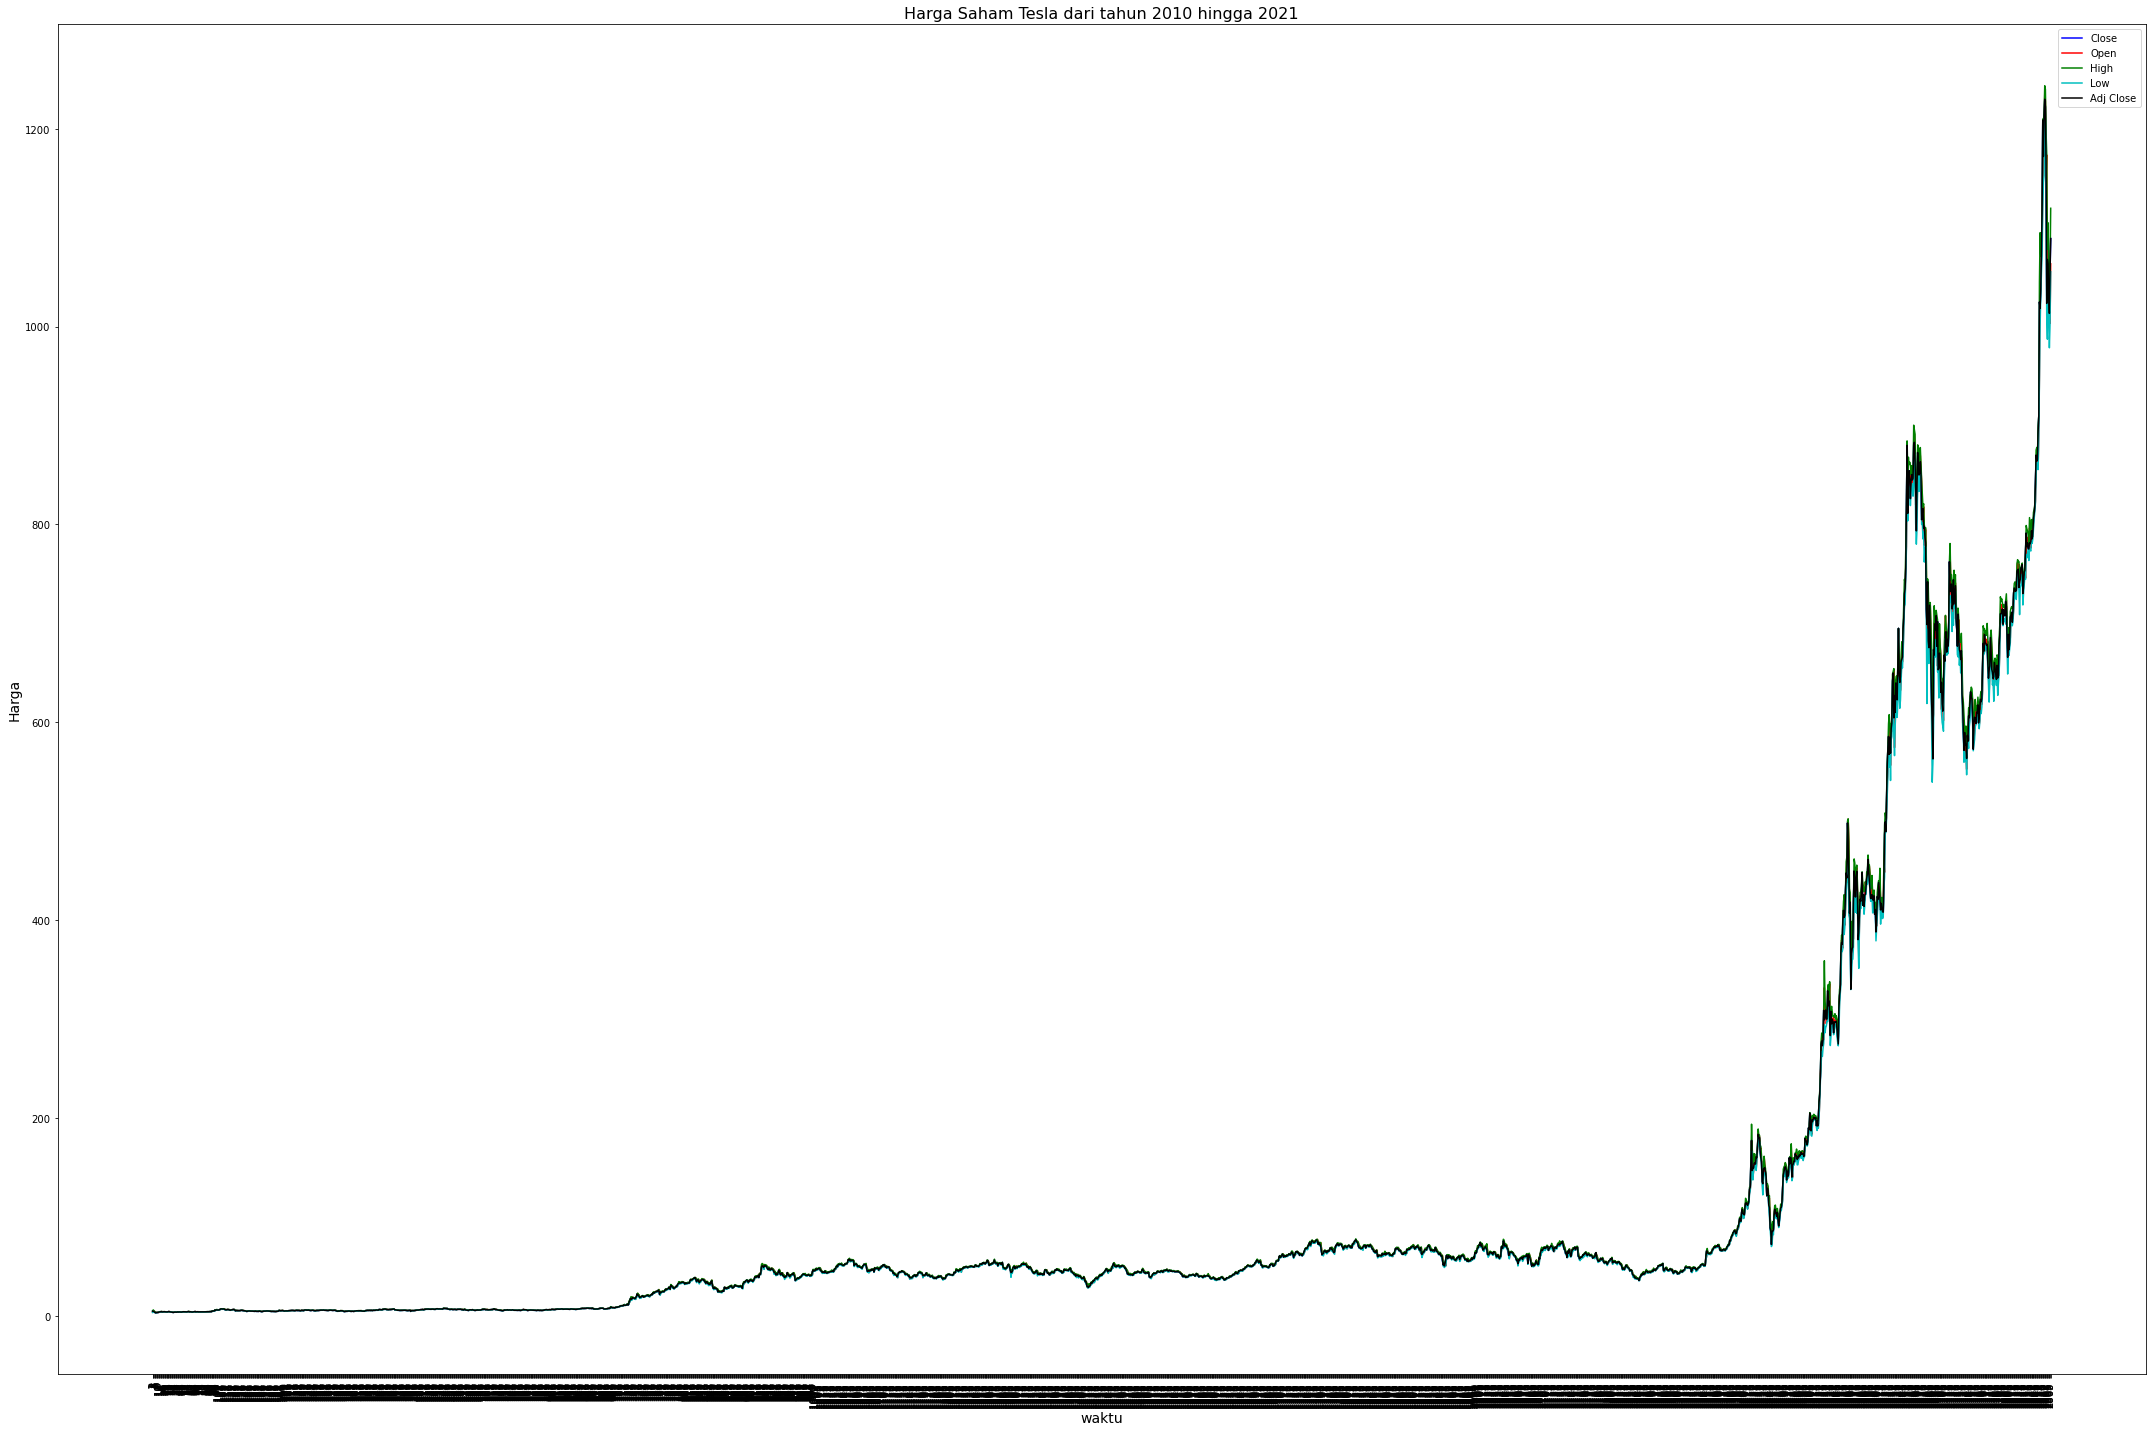

In [11]:
plt.figure(figsize = (30,20))

plt.title('Harga Saham Tesla dari tahun 2010 hingga 2021', size = 16)

plt.plot(dv.no, dv.Close, 'b', label = 'Close')
plt.plot(dv.no, dv.Open ,'r', label = 'Open')
plt.plot(dv.no, dv.High, 'g', label = 'High')
plt.plot(dv.no, dv.Low, 'c', label = 'Low')
plt.plot(dv.no, dv['Adj Close'], 'k', label = 'Adj Close')

plt.xticks(dv.no, rotation = 90)


plt.xlabel('waktu', size = 14)
plt.ylabel('Harga', size = 14)

# untuk memunculkan label
plt.legend()

plt.tight_layout()
plt.savefig('visualisasi awal.png'); 

## Adj CLOSE

In [12]:
df1 = df.reset_index()['Adj Close']

In [13]:
df1.shape

(2869,)

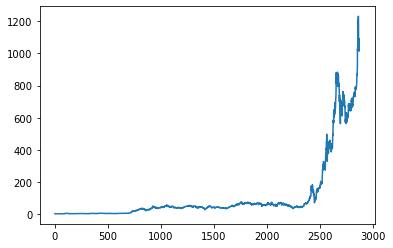

In [14]:
plt.plot(df1)

* LSTM sensitif terhadap scale dari data, oleh sebab itu diterapkan MinMax Scaler

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

* tahapan tersebut mengubah data menjadi array

In [16]:
df1

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.82350111],
       [0.85719988],
       [0.88514366]])

In [17]:
df.shape

(2869, 7)

*Metode*
* Cross Validarion
* Randomseed 
kedua metode ini bekerja dengan baik ketika berhadapan dengan kasus klasifikasi dan regresi

*Untuk time series, dilakukan pembagian data yang mana bergantung pada tanggal*



### Partisi Data

In [18]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.7)
test_size = len(df1)-training_size
train_data, test_data= df1[0:training_size,:], df1[training_size:len(df1),:1]

In [19]:
training_size, test_size

(2008, 861)

In [20]:
len(train_data), len(test_data)

(2008, 861)

In [21]:
import numpy
#convert an array of values into dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) -time_step-1):
        a = dataset[i:(i+time_step), 0]  ### i = 0,   0,1,2,3 (bergantung pada time stamp untuk x train)
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [22]:
### dalam hal ini diambil time step 100
# reshape into X=t, t+1, t+2, t+3, dan Y = t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train)

[[1.31893210e-03 1.30915016e-03 1.00427957e-03 ... 2.44548597e-03
  2.26125936e-03 2.23191353e-03]
 [1.30915016e-03 1.00427957e-03 5.54310154e-04 ... 2.26125936e-03
  2.23191353e-03 2.29712649e-03]
 [1.00427957e-03 5.54310154e-04 5.05400434e-05 ... 2.23191353e-03
  2.29712649e-03 2.47646213e-03]
 ...
 [5.47397547e-02 5.49402870e-02 5.38153651e-02 ... 5.15671459e-02
  5.33067040e-02 5.36343992e-02]
 [5.49402870e-02 5.38153651e-02 5.24703470e-02 ... 5.33067040e-02
  5.36343992e-02 5.57440368e-02]
 [5.38153651e-02 5.24703470e-02 5.33197458e-02 ... 5.36343992e-02
  5.57440368e-02 5.58174046e-02]]


In [24]:
print(X_train.shape), print(y_train.shape)

(1907, 100)
(1907,)


(None, None)

In [25]:
 print(X_test.shape), print(ytest.shape)

(760, 100)
(760,)


(None, None)

In [26]:
#Sebelum melakukan lSTM melakukan reshape to be 3 dimensi 
# yakni, [samples, time_steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)


## LSTM

In [27]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(120,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer ='adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 120, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 120, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
X_train[:100]

array([[[1.31893210e-03],
        [1.30915016e-03],
        [1.00427957e-03],
        ...,
        [2.44548597e-03],
        [2.26125936e-03],
        [2.23191353e-03]],

       [[1.30915016e-03],
        [1.00427957e-03],
        [5.54310154e-04],
        ...,
        [2.26125936e-03],
        [2.23191353e-03],
        [2.29712649e-03]],

       [[1.00427957e-03],
        [5.54310154e-04],
        [5.05400434e-05],
        ...,
        [2.23191353e-03],
        [2.29712649e-03],
        [2.47646213e-03]],

       ...,

       [[2.44548597e-03],
        [2.26125936e-03],
        [2.23191353e-03],
        ...,
        [1.77705314e-03],
        [1.74281634e-03],
        [1.86509064e-03]],

       [[2.26125936e-03],
        [2.23191353e-03],
        [2.29712649e-03],
        ...,
        [1.74281634e-03],
        [1.86509064e-03],
        [1.74281634e-03]],

       [[2.23191353e-03],
        [2.29712649e-03],
        [2.47646213e-03],
        ...,
        [1.86509064e-03],
        [1.7428

In [31]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=50, batch_size = 10, verbose=1)

Epoch 1/50
191/191 [==============================] - 14s 72ms/step - loss: 2.0351e-05 - val_loss: 0.0081
Epoch 2/50
191/191 [==============================] - 13s 66ms/step - loss: 7.2597e-06 - val_loss: 0.0074
Epoch 3/50
191/191 [==============================] - 13s 67ms/step - loss: 6.9380e-06 - val_loss: 0.0053
Epoch 4/50
191/191 [==============================] - 13s 68ms/step - loss: 7.9229e-06 - val_loss: 0.0054
Epoch 5/50
191/191 [==============================] - 13s 67ms/step - loss: 5.4245e-06 - val_loss: 0.0044
Epoch 6/50
191/191 [==============================] - 13s 66ms/step - loss: 6.3630e-06 - val_loss: 0.0062
Epoch 7/50
191/191 [==============================] - 13s 67ms/step - loss: 4.0000e-06 - val_loss: 0.0053
Epoch 8/50
191/191 [==============================] - 13s 68ms/step - loss: 3.5536e-06 - val_loss: 0.0046
Epoch 9/50
191/191 [==============================] - 13s 70ms/step - loss: 4.6658e-06 - val_loss: 0.0071
Epoch 10/50
191/191 [=========================

## Prediction and check the performance metrics

In [32]:
import tensorflow as tf

In [33]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict= model.predict(X_test)


In [34]:
### Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### Calculate RMSE performance metrics (untuk training data)
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

40.47599873876992

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

394.08702978996183

* terlihat bahwa hasil RMSE training data lebih baik dari pada MSE dari Data Test

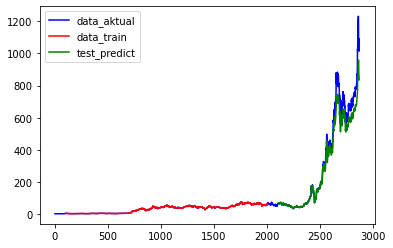

In [75]:
### plotting
# shift train predictions for plotting
look_back= 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict


# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),'b', label= 'data_aktual')
plt.plot(trainPredictPlot, 'r', label = 'data_train')
plt.plot(testPredictPlot, 'g', label = 'test_predict')

# Menampilkan legenda
plt.legend()

plt.show()


## Forecasting

In [39]:
len(test_data) #last date 17 Nov

861

In [40]:
x_input=test_data[741:].reshape(1,-1) #Untuk date 18 Nov dst
x_input.shape

(1, 120)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
temp_input

[0.5060036737687998,
 0.4906949079407974,
 0.46438150496109953,
 0.4857468689501581,
 0.49070306771232586,
 0.489447736179969,
 0.4855268086342682,
 0.4947707178950851,
 0.49458324694042766,
 0.5009414998720106,
 0.4859995667218381,
 0.490491117443083,
 0.5000529521077641,
 0.505522706999982,
 0.5035011207507332,
 0.5058487913602129,
 0.5326350021523619,
 0.5515875184397998,
 0.5451069708305385,
 0.5588424308126003,
 0.5523537731566919,
 0.5514897030767069,
 0.5500386910932827,
 0.5508375832659648,
 0.535088647896463,
 0.5229182850790939,
 0.5295699857302796,
 0.5329447677846978,
 0.5563806750218522,
 0.542392467543229,
 0.5300346337712024,
 0.5277684597969207,
 0.5225677222194396,
 0.5241980462011546,
 0.5358385830702981,
 0.5315915711643665,
 0.5266761704446792,
 0.5218830138626269,
 0.5334909124608185,
 0.5230242602137153,
 0.5248175766506643,
 0.5495740430523599,
 0.5576034180081385,
 0.5759200843030098,
 0.5759771513485037,
 0.5769390367915816,
 0.5799633057112269,
 0.567303816353

In [43]:
#demonstrate prediction for the next 120 days
from numpy import array

lst_output=[]
n_steps =120
i = 0
while(i<120):
    
    if (len(temp_input)>120):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1, n_steps,1))
        #print(x_print)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #pprint(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

[0.70517826]
121
1 day input [0.49069491 0.4643815  0.48574687 0.49070307 0.48944774 0.48552681
 0.49477072 0.49458325 0.5009415  0.48599957 0.49049112 0.50005295
 0.50552271 0.50350112 0.50584879 0.532635   0.55158752 0.54510697
 0.55884243 0.55235377 0.5514897  0.55003869 0.55083758 0.53508865
 0.52291829 0.52956999 0.53294477 0.55638068 0.54239247 0.53003463
 0.52776846 0.52256772 0.52419805 0.53583858 0.53159157 0.52667617
 0.52188301 0.53349091 0.52302426 0.52481758 0.54957404 0.55760342
 0.57592008 0.57597715 0.57693904 0.57996331 0.56730382 0.57925412
 0.57618094 0.57441205 0.58617484 0.5820338  0.55676378 0.54008559
 0.55906254 0.54641121 0.55194619 0.57317299 0.5749582  0.57716731
 0.56898305 0.5777542  0.59323412 0.59715504 0.59582638 0.59444059
 0.59540248 0.61117584 0.61195025 0.61275726 0.59760342 0.60308945
 0.60430403 0.61354799 0.61449356 0.61653146 0.59263091 0.60013856
 0.610377   0.61176278 0.62867739 0.64251067 0.63126144 0.6343183
 0.62956589 0.62935394 0.63449766 

8 day output [[0.322695]]
9 day input [0.5009415  0.48599957 0.49049112 0.50005295 0.50552271 0.50350112
 0.50584879 0.532635   0.55158752 0.54510697 0.55884243 0.55235377
 0.5514897  0.55003869 0.55083758 0.53508865 0.52291829 0.52956999
 0.53294477 0.55638068 0.54239247 0.53003463 0.52776846 0.52256772
 0.52419805 0.53583858 0.53159157 0.52667617 0.52188301 0.53349091
 0.52302426 0.52481758 0.54957404 0.55760342 0.57592008 0.57597715
 0.57693904 0.57996331 0.56730382 0.57925412 0.57618094 0.57441205
 0.58617484 0.5820338  0.55676378 0.54008559 0.55906254 0.54641121
 0.55194619 0.57317299 0.5749582  0.57716731 0.56898305 0.5777542
 0.59323412 0.59715504 0.59582638 0.59444059 0.59540248 0.61117584
 0.61195025 0.61275726 0.59760342 0.60308945 0.60430403 0.61354799
 0.61449356 0.61653146 0.59263091 0.60013856 0.610377   0.61176278
 0.62867739 0.64251067 0.63126144 0.6343183  0.62956589 0.62935394
 0.63449766 0.63373141 0.63549214 0.64434478 0.63772567 0.64298348
 0.65421638 0.65858569 0.

15 day output [[0.21387474]]
16 day input [0.532635   0.55158752 0.54510697 0.55884243 0.55235377 0.5514897
 0.55003869 0.55083758 0.53508865 0.52291829 0.52956999 0.53294477
 0.55638068 0.54239247 0.53003463 0.52776846 0.52256772 0.52419805
 0.53583858 0.53159157 0.52667617 0.52188301 0.53349091 0.52302426
 0.52481758 0.54957404 0.55760342 0.57592008 0.57597715 0.57693904
 0.57996331 0.56730382 0.57925412 0.57618094 0.57441205 0.58617484
 0.5820338  0.55676378 0.54008559 0.55906254 0.54641121 0.55194619
 0.57317299 0.5749582  0.57716731 0.56898305 0.5777542  0.59323412
 0.59715504 0.59582638 0.59444059 0.59540248 0.61117584 0.61195025
 0.61275726 0.59760342 0.60308945 0.60430403 0.61354799 0.61449356
 0.61653146 0.59263091 0.60013856 0.610377   0.61176278 0.62867739
 0.64251067 0.63126144 0.6343183  0.62956589 0.62935394 0.63449766
 0.63373141 0.63549214 0.64434478 0.63772567 0.64298348 0.65421638
 0.65858569 0.66448745 0.68463012 0.70670468 0.70194416 0.70319133
 0.72617891 0.7389606

 0.20575461 0.19896081 0.1933077  0.18862003 0.18473724 0.18151499]
22 day output [[0.17882568]]
23 day input [0.55083758 0.53508865 0.52291829 0.52956999 0.53294477 0.55638068
 0.54239247 0.53003463 0.52776846 0.52256772 0.52419805 0.53583858
 0.53159157 0.52667617 0.52188301 0.53349091 0.52302426 0.52481758
 0.54957404 0.55760342 0.57592008 0.57597715 0.57693904 0.57996331
 0.56730382 0.57925412 0.57618094 0.57441205 0.58617484 0.5820338
 0.55676378 0.54008559 0.55906254 0.54641121 0.55194619 0.57317299
 0.5749582  0.57716731 0.56898305 0.5777542  0.59323412 0.59715504
 0.59582638 0.59444059 0.59540248 0.61117584 0.61195025 0.61275726
 0.59760342 0.60308945 0.60430403 0.61354799 0.61449356 0.61653146
 0.59263091 0.60013856 0.610377   0.61176278 0.62867739 0.64251067
 0.63126144 0.6343183  0.62956589 0.62935394 0.63449766 0.63373141
 0.63549214 0.64434478 0.63772567 0.64298348 0.65421638 0.65858569
 0.66448745 0.68463012 0.70670468 0.70194416 0.70319133 0.72617891
 0.73896064 0.832850

28 day output [[0.16866453]]
29 day input [0.54239247 0.53003463 0.52776846 0.52256772 0.52419805 0.53583858
 0.53159157 0.52667617 0.52188301 0.53349091 0.52302426 0.52481758
 0.54957404 0.55760342 0.57592008 0.57597715 0.57693904 0.57996331
 0.56730382 0.57925412 0.57618094 0.57441205 0.58617484 0.5820338
 0.55676378 0.54008559 0.55906254 0.54641121 0.55194619 0.57317299
 0.5749582  0.57716731 0.56898305 0.5777542  0.59323412 0.59715504
 0.59582638 0.59444059 0.59540248 0.61117584 0.61195025 0.61275726
 0.59760342 0.60308945 0.60430403 0.61354799 0.61449356 0.61653146
 0.59263091 0.60013856 0.610377   0.61176278 0.62867739 0.64251067
 0.63126144 0.6343183  0.62956589 0.62935394 0.63449766 0.63373141
 0.63549214 0.64434478 0.63772567 0.64298348 0.65421638 0.65858569
 0.66448745 0.68463012 0.70670468 0.70194416 0.70319133 0.72617891
 0.73896064 0.83285099 0.82760951 0.8434481  0.87538619 0.90551455
 0.98262069 0.95279394 0.98691661 1.         0.99362538 0.94540853
 0.83174239 0.8679763

34 day output [[0.16078755]]
35 day input [0.53159157 0.52667617 0.52188301 0.53349091 0.52302426 0.52481758
 0.54957404 0.55760342 0.57592008 0.57597715 0.57693904 0.57996331
 0.56730382 0.57925412 0.57618094 0.57441205 0.58617484 0.5820338
 0.55676378 0.54008559 0.55906254 0.54641121 0.55194619 0.57317299
 0.5749582  0.57716731 0.56898305 0.5777542  0.59323412 0.59715504
 0.59582638 0.59444059 0.59540248 0.61117584 0.61195025 0.61275726
 0.59760342 0.60308945 0.60430403 0.61354799 0.61449356 0.61653146
 0.59263091 0.60013856 0.610377   0.61176278 0.62867739 0.64251067
 0.63126144 0.6343183  0.62956589 0.62935394 0.63449766 0.63373141
 0.63549214 0.64434478 0.63772567 0.64298348 0.65421638 0.65858569
 0.66448745 0.68463012 0.70670468 0.70194416 0.70319133 0.72617891
 0.73896064 0.83285099 0.82760951 0.8434481  0.87538619 0.90551455
 0.98262069 0.95279394 0.98691661 1.         0.99362538 0.94540853
 0.83174239 0.8679763  0.86435703 0.83982883 0.82350111 0.85719988
 0.88514366 0.7051782

41 day output [[0.1504734]]
42 day input [0.55760342 0.57592008 0.57597715 0.57693904 0.57996331 0.56730382
 0.57925412 0.57618094 0.57441205 0.58617484 0.5820338  0.55676378
 0.54008559 0.55906254 0.54641121 0.55194619 0.57317299 0.5749582
 0.57716731 0.56898305 0.5777542  0.59323412 0.59715504 0.59582638
 0.59444059 0.59540248 0.61117584 0.61195025 0.61275726 0.59760342
 0.60308945 0.60430403 0.61354799 0.61449356 0.61653146 0.59263091
 0.60013856 0.610377   0.61176278 0.62867739 0.64251067 0.63126144
 0.6343183  0.62956589 0.62935394 0.63449766 0.63373141 0.63549214
 0.64434478 0.63772567 0.64298348 0.65421638 0.65858569 0.66448745
 0.68463012 0.70670468 0.70194416 0.70319133 0.72617891 0.73896064
 0.83285099 0.82760951 0.8434481  0.87538619 0.90551455 0.98262069
 0.95279394 0.98691661 1.         0.99362538 0.94540853 0.83174239
 0.8679763  0.86435703 0.83982883 0.82350111 0.85719988 0.88514366
 0.70517826 0.63182181 0.560808   0.50077945 0.45144632 0.41086969
 0.37695211 0.34796196

48 day output [[0.14029972]]
49 day input [0.57618094 0.57441205 0.58617484 0.5820338  0.55676378 0.54008559
 0.55906254 0.54641121 0.55194619 0.57317299 0.5749582  0.57716731
 0.56898305 0.5777542  0.59323412 0.59715504 0.59582638 0.59444059
 0.59540248 0.61117584 0.61195025 0.61275726 0.59760342 0.60308945
 0.60430403 0.61354799 0.61449356 0.61653146 0.59263091 0.60013856
 0.610377   0.61176278 0.62867739 0.64251067 0.63126144 0.6343183
 0.62956589 0.62935394 0.63449766 0.63373141 0.63549214 0.64434478
 0.63772567 0.64298348 0.65421638 0.65858569 0.66448745 0.68463012
 0.70670468 0.70194416 0.70319133 0.72617891 0.73896064 0.83285099
 0.82760951 0.8434481  0.87538619 0.90551455 0.98262069 0.95279394
 0.98691661 1.         0.99362538 0.94540853 0.83174239 0.8679763
 0.86435703 0.83982883 0.82350111 0.85719988 0.88514366 0.70517826
 0.63182181 0.560808   0.50077945 0.45144632 0.41086969 0.37695211
 0.34796196 0.32269499 0.30040997 0.28068721 0.26328859 0.24805571
 0.23484725 0.22351067

 0.13764645 0.13637343 0.13513711 0.13393769 0.13277492 0.13164823]
56 day output [[0.13055691]]
57 day input [0.55194619 0.57317299 0.5749582  0.57716731 0.56898305 0.5777542
 0.59323412 0.59715504 0.59582638 0.59444059 0.59540248 0.61117584
 0.61195025 0.61275726 0.59760342 0.60308945 0.60430403 0.61354799
 0.61449356 0.61653146 0.59263091 0.60013856 0.610377   0.61176278
 0.62867739 0.64251067 0.63126144 0.6343183  0.62956589 0.62935394
 0.63449766 0.63373141 0.63549214 0.64434478 0.63772567 0.64298348
 0.65421638 0.65858569 0.66448745 0.68463012 0.70670468 0.70194416
 0.70319133 0.72617891 0.73896064 0.83285099 0.82760951 0.8434481
 0.87538619 0.90551455 0.98262069 0.95279394 0.98691661 1.
 0.99362538 0.94540853 0.83174239 0.8679763  0.86435703 0.83982883
 0.82350111 0.85719988 0.88514366 0.70517826 0.63182181 0.560808
 0.50077945 0.45144632 0.41086969 0.37695211 0.34796196 0.32269499
 0.30040997 0.28068721 0.26328859 0.24805571 0.23484725 0.22351067
 0.21387474 0.20575461 0.198960

62 day output [[0.12468459]]
63 day input [0.59323412 0.59715504 0.59582638 0.59444059 0.59540248 0.61117584
 0.61195025 0.61275726 0.59760342 0.60308945 0.60430403 0.61354799
 0.61449356 0.61653146 0.59263091 0.60013856 0.610377   0.61176278
 0.62867739 0.64251067 0.63126144 0.6343183  0.62956589 0.62935394
 0.63449766 0.63373141 0.63549214 0.64434478 0.63772567 0.64298348
 0.65421638 0.65858569 0.66448745 0.68463012 0.70670468 0.70194416
 0.70319133 0.72617891 0.73896064 0.83285099 0.82760951 0.8434481
 0.87538619 0.90551455 0.98262069 0.95279394 0.98691661 1.
 0.99362538 0.94540853 0.83174239 0.8679763  0.86435703 0.83982883
 0.82350111 0.85719988 0.88514366 0.70517826 0.63182181 0.560808
 0.50077945 0.45144632 0.41086969 0.37695211 0.34796196 0.32269499
 0.30040997 0.28068721 0.26328859 0.24805571 0.23484725 0.22351067
 0.21387474 0.20575461 0.19896081 0.1933077  0.18862003 0.18473724
 0.18151499 0.17882568 0.17655805 0.17461601 0.17291819 0.17139609
 0.16999331 0.16866453 0.167373

 0.12380604 0.12295239 0.12212229 0.12131455 0.12052792 0.11976134]
69 day output [[0.1190137]]
70 day input [0.61275726 0.59760342 0.60308945 0.60430403 0.61354799 0.61449356
 0.61653146 0.59263091 0.60013856 0.610377   0.61176278 0.62867739
 0.64251067 0.63126144 0.6343183  0.62956589 0.62935394 0.63449766
 0.63373141 0.63549214 0.64434478 0.63772567 0.64298348 0.65421638
 0.65858569 0.66448745 0.68463012 0.70670468 0.70194416 0.70319133
 0.72617891 0.73896064 0.83285099 0.82760951 0.8434481  0.87538619
 0.90551455 0.98262069 0.95279394 0.98691661 1.         0.99362538
 0.94540853 0.83174239 0.8679763  0.86435703 0.83982883 0.82350111
 0.85719988 0.88514366 0.70517826 0.63182181 0.560808   0.50077945
 0.45144632 0.41086969 0.37695211 0.34796196 0.32269499 0.30040997
 0.28068721 0.26328859 0.24805571 0.23484725 0.22351067 0.21387474
 0.20575461 0.19896081 0.1933077  0.18862003 0.18473724 0.18151499
 0.17882568 0.17655805 0.17461601 0.17291819 0.17139609 0.16999331
 0.16866453 0.167373

75 day output [[0.11487672]]
76 day input [0.61653146 0.59263091 0.60013856 0.610377   0.61176278 0.62867739
 0.64251067 0.63126144 0.6343183  0.62956589 0.62935394 0.63449766
 0.63373141 0.63549214 0.64434478 0.63772567 0.64298348 0.65421638
 0.65858569 0.66448745 0.68463012 0.70670468 0.70194416 0.70319133
 0.72617891 0.73896064 0.83285099 0.82760951 0.8434481  0.87538619
 0.90551455 0.98262069 0.95279394 0.98691661 1.         0.99362538
 0.94540853 0.83174239 0.8679763  0.86435703 0.83982883 0.82350111
 0.85719988 0.88514366 0.70517826 0.63182181 0.560808   0.50077945
 0.45144632 0.41086969 0.37695211 0.34796196 0.32269499 0.30040997
 0.28068721 0.26328859 0.24805571 0.23484725 0.22351067 0.21387474
 0.20575461 0.19896081 0.1933077  0.18862003 0.18473724 0.18151499
 0.17882568 0.17655805 0.17461601 0.17291819 0.17139609 0.16999331
 0.16866453 0.16737397 0.16609468 0.1648071  0.16349798 0.16215935
 0.16078755 0.15938224 0.15794566 0.15648192 0.15499645 0.15349543
 0.15198559 0.150473

82 day output [[0.11066817]]
83 day input [0.63126144 0.6343183  0.62956589 0.62935394 0.63449766 0.63373141
 0.63549214 0.64434478 0.63772567 0.64298348 0.65421638 0.65858569
 0.66448745 0.68463012 0.70670468 0.70194416 0.70319133 0.72617891
 0.73896064 0.83285099 0.82760951 0.8434481  0.87538619 0.90551455
 0.98262069 0.95279394 0.98691661 1.         0.99362538 0.94540853
 0.83174239 0.8679763  0.86435703 0.83982883 0.82350111 0.85719988
 0.88514366 0.70517826 0.63182181 0.560808   0.50077945 0.45144632
 0.41086969 0.37695211 0.34796196 0.32269499 0.30040997 0.28068721
 0.26328859 0.24805571 0.23484725 0.22351067 0.21387474 0.20575461
 0.19896081 0.1933077  0.18862003 0.18473724 0.18151499 0.17882568
 0.17655805 0.17461601 0.17291819 0.17139609 0.16999331 0.16866453
 0.16737397 0.16609468 0.1648071  0.16349798 0.16215935 0.16078755
 0.15938224 0.15794566 0.15648192 0.15499645 0.15349543 0.15198559
 0.1504734  0.14896527 0.14746733 0.14598498 0.14452316 0.14308612
 0.14167733 0.140299

88 day output [[0.10748557]]
89 day input [0.63549214 0.64434478 0.63772567 0.64298348 0.65421638 0.65858569
 0.66448745 0.68463012 0.70670468 0.70194416 0.70319133 0.72617891
 0.73896064 0.83285099 0.82760951 0.8434481  0.87538619 0.90551455
 0.98262069 0.95279394 0.98691661 1.         0.99362538 0.94540853
 0.83174239 0.8679763  0.86435703 0.83982883 0.82350111 0.85719988
 0.88514366 0.70517826 0.63182181 0.560808   0.50077945 0.45144632
 0.41086969 0.37695211 0.34796196 0.32269499 0.30040997 0.28068721
 0.26328859 0.24805571 0.23484725 0.22351067 0.21387474 0.20575461
 0.19896081 0.1933077  0.18862003 0.18473724 0.18151499 0.17882568
 0.17655805 0.17461601 0.17291819 0.17139609 0.16999331 0.16866453
 0.16737397 0.16609468 0.1648071  0.16349798 0.16215935 0.16078755
 0.15938224 0.15794566 0.15648192 0.15499645 0.15349543 0.15198559
 0.1504734  0.14896527 0.14746733 0.14598498 0.14452316 0.14308612
 0.14167733 0.14029972 0.13895559 0.13764645 0.13637343 0.13513711
 0.13393769 0.132774

95 day output [[0.10418594]]
96 day input [0.68463012 0.70670468 0.70194416 0.70319133 0.72617891 0.73896064
 0.83285099 0.82760951 0.8434481  0.87538619 0.90551455 0.98262069
 0.95279394 0.98691661 1.         0.99362538 0.94540853 0.83174239
 0.8679763  0.86435703 0.83982883 0.82350111 0.85719988 0.88514366
 0.70517826 0.63182181 0.560808   0.50077945 0.45144632 0.41086969
 0.37695211 0.34796196 0.32269499 0.30040997 0.28068721 0.26328859
 0.24805571 0.23484725 0.22351067 0.21387474 0.20575461 0.19896081
 0.1933077  0.18862003 0.18473724 0.18151499 0.17882568 0.17655805
 0.17461601 0.17291819 0.17139609 0.16999331 0.16866453 0.16737397
 0.16609468 0.1648071  0.16349798 0.16215935 0.16078755 0.15938224
 0.15794566 0.15648192 0.15499645 0.15349543 0.15198559 0.1504734
 0.14896527 0.14746733 0.14598498 0.14452316 0.14308612 0.14167733
 0.14029972 0.13895559 0.13764645 0.13637343 0.13513711 0.13393769
 0.13277492 0.13164823 0.13055691 0.12949979 0.12847582 0.12748373
 0.12652206 0.1255894

 0.10374693 0.10331546 0.10289131 0.10247432 0.10206432 0.10166118]
102 day output [[0.10126472]]
103 day input [0.82760951 0.8434481  0.87538619 0.90551455 0.98262069 0.95279394
 0.98691661 1.         0.99362538 0.94540853 0.83174239 0.8679763
 0.86435703 0.83982883 0.82350111 0.85719988 0.88514366 0.70517826
 0.63182181 0.560808   0.50077945 0.45144632 0.41086969 0.37695211
 0.34796196 0.32269499 0.30040997 0.28068721 0.26328859 0.24805571
 0.23484725 0.22351067 0.21387474 0.20575461 0.19896081 0.1933077
 0.18862003 0.18473724 0.18151499 0.17882568 0.17655805 0.17461601
 0.17291819 0.17139609 0.16999331 0.16866453 0.16737397 0.16609468
 0.1648071  0.16349798 0.16215935 0.16078755 0.15938224 0.15794566
 0.15648192 0.15499645 0.15349543 0.15198559 0.1504734  0.14896527
 0.14746733 0.14598498 0.14452316 0.14308612 0.14167733 0.14029972
 0.13895559 0.13764645 0.13637343 0.13513711 0.13393769 0.13277492
 0.13164823 0.13055691 0.12949979 0.12847582 0.12748373 0.12652206
 0.12558948 0.12468

109 day output [[0.09866304]]
110 day input [1.         0.99362538 0.94540853 0.83174239 0.8679763  0.86435703
 0.83982883 0.82350111 0.85719988 0.88514366 0.70517826 0.63182181
 0.560808   0.50077945 0.45144632 0.41086969 0.37695211 0.34796196
 0.32269499 0.30040997 0.28068721 0.26328859 0.24805571 0.23484725
 0.22351067 0.21387474 0.20575461 0.19896081 0.1933077  0.18862003
 0.18473724 0.18151499 0.17882568 0.17655805 0.17461601 0.17291819
 0.17139609 0.16999331 0.16866453 0.16737397 0.16609468 0.1648071
 0.16349798 0.16215935 0.16078755 0.15938224 0.15794566 0.15648192
 0.15499645 0.15349543 0.15198559 0.1504734  0.14896527 0.14746733
 0.14598498 0.14452316 0.14308612 0.14167733 0.14029972 0.13895559
 0.13764645 0.13637343 0.13513711 0.13393769 0.13277492 0.13164823
 0.13055691 0.12949979 0.12847582 0.12748373 0.12652206 0.12558948
 0.12468459 0.12380604 0.12295239 0.12212229 0.12131455 0.12052792
 0.11976134 0.1190137  0.11828406 0.11757153 0.11687525 0.11619446
 0.1155285  0.11487

 0.0979713  0.09763335 0.09730056 0.09697276 0.09664989 0.0963318 ]
117 day output [[0.0960184]]
118 day input [0.85719988 0.88514366 0.70517826 0.63182181 0.560808   0.50077945
 0.45144632 0.41086969 0.37695211 0.34796196 0.32269499 0.30040997
 0.28068721 0.26328859 0.24805571 0.23484725 0.22351067 0.21387474
 0.20575461 0.19896081 0.1933077  0.18862003 0.18473724 0.18151499
 0.17882568 0.17655805 0.17461601 0.17291819 0.17139609 0.16999331
 0.16866453 0.16737397 0.16609468 0.1648071  0.16349798 0.16215935
 0.16078755 0.15938224 0.15794566 0.15648192 0.15499645 0.15349543
 0.15198559 0.1504734  0.14896527 0.14746733 0.14598498 0.14452316
 0.14308612 0.14167733 0.14029972 0.13895559 0.13764645 0.13637343
 0.13513711 0.13393769 0.13277492 0.13164823 0.13055691 0.12949979
 0.12847582 0.12748373 0.12652206 0.12558948 0.12468459 0.12380604
 0.12295239 0.12212229 0.12131455 0.12052792 0.11976134 0.1190137
 0.11828406 0.11757153 0.11687525 0.11619446 0.1155285  0.11487672
 0.1142385  0.11361

In [59]:
day_new = np.arange(2749,2869)
day_pred = np.arange (2870, 2990)

In [60]:
len(df1)

2869

In [61]:
df3 = df1.tolist()
df3.extend(lst_output)


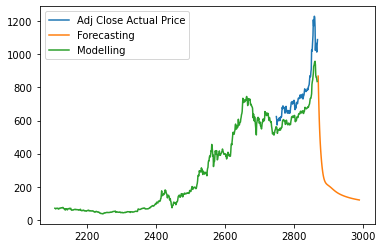

In [62]:
plt.plot(day_new, scaler.inverse_transform(df1[2749:]), label = 'Adj Close Actual Price')
plt.plot(day_pred, scaler.inverse_transform(lst_output),label = 'Forecasting' )
plt.plot(testPredictPlot, label = 'Modelling')
### Memunvulkan legend (label)
plt.legend()

plt.show()

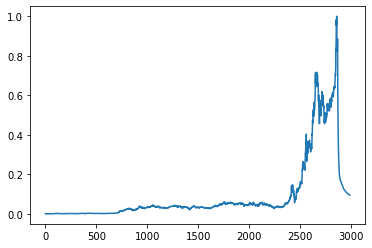

In [48]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[0:])

#### DataFrame dari prediksi Adj 120 hari setelah tanggal 17 Nov

In [68]:
predict_AdjClose = scaler.inverse_transform(lst_output)

In [71]:
tesla_predict = pd.DataFrame(predict_AdjClose,columns = ['Predict'])
tesla_predict

,Predict
0,868.237455
1,778.247428
2,691.131237
3,617.491207
4,556.971794
...,...
115,121.725259
116,121.335036
117,120.950580
118,120.571709


## Residual Predicted

* untuk mengetahui hasil aktual dengan hasil prediksi

In [88]:
ytrain= scaler.fit_transform(np.array(y_train).reshape(-1,1))
ytrain = pd.DataFrame(ytrain[:760])


In [89]:
ytrain.columns =['ytrain']
ytrain

,ytrain
0,0.022193
1,0.025222
2,0.031858
3,0.035080
4,0.037558
...,...
755,0.287083
756,0.273371
757,0.276097
758,0.274114


In [87]:
test_prediction = scaler.fit_transform(test_predict)
test_prediction = pd.DataFrame(test_prediction)
test_prediction

,0
0,0.037304
1,0.037036
2,0.032820
3,0.034405
4,0.035657
...,...
755,0.908052
756,0.896060
757,0.895413
758,0.882562


In [91]:
test_prediction.columns = ['test prediction']

In [92]:
Value = pd.concat( [test_prediction, ytrain], axis=1)
Value

,test prediction,ytrain
0,0.037304,0.022193
1,0.037036,0.025222
2,0.032820,0.031858
3,0.034405,0.035080
4,0.035657,0.037558
...,...,...
755,0.908052,0.287083
756,0.896060,0.273371
757,0.895413,0.276097
758,0.882562,0.274114


In [93]:
residuals = ytrain.values-test_prediction.values
residu = pd.DataFrame(residuals,columns = ["Residuals"])

residu.reset_index(drop=True, inplace=True)
Val_pre = pd.concat([Value,residu],axis = 1)
Val_pre

,test prediction,ytrain,Residuals
0,0.037304,0.022193,-0.015111
1,0.037036,0.025222,-0.011814
2,0.032820,0.031858,-0.000961
3,0.034405,0.035080,0.000675
4,0.035657,0.037558,0.001902
...,...,...,...
755,0.908052,0.287083,-0.620969
756,0.896060,0.273371,-0.622689
757,0.895413,0.276097,-0.619317
758,0.882562,0.274114,-0.608448


C:\Users\Theausdream\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


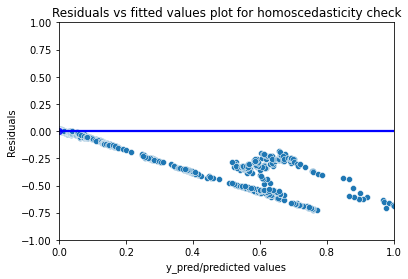

In [94]:
p = sns.scatterplot(Val_pre['test prediction'],Val_pre['Residuals'])

plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

plt.ylim(-1,1)
plt.xlim(0,1)

p = sns.regplot(x = [0,26],y=[0,0],color='blue')

p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

**Heteroscedasticity**

In [98]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
train_data1 = pd.DataFrame(train_data[:760])
train_data1.columns = ['Xtrain'] 
train_data1

,Xtrain
0,0.001319
1,0.001309
2,0.001004
3,0.000554
4,0.000051
...,...
755,0.014927
756,0.016528
757,0.016633
758,0.016212


In [99]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(Val_pre['Residuals'], train_data1)

lzip(name, test)

[('F statistic', 82.464482058605), ('p-value', 1.9750954276952774e-253)]

**Goldfeld Quandt Test**

Null Hypothesis: Error terms are homoscedastic

Alternative Hypothesis: Error terms are heteroscedastic.

#### normality test for residuals

C:\Users\Theausdream\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


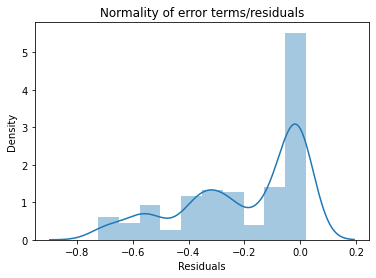

In [100]:
p = sns.distplot(Val_pre['Residuals'],kde=True)
p = plt.title('Normality of error terms/residuals')

In [101]:
from statsmodels.stats import diagnostic as diag

min(diag.acorr_ljungbox(Val_pre['Residuals'] , lags = 40)[1])

C:\Users\Theausdream\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.0

* redisuals are not independent